In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df = pd.read_csv('dataset_house.csv')

In [13]:
df.drop_duplicates(inplace=True)


In [14]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (3448, 18)


In [15]:
print("Columns in your dataset:")
print(df.columns)

Columns in your dataset:
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [16]:
target_column = 'price'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [17]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()


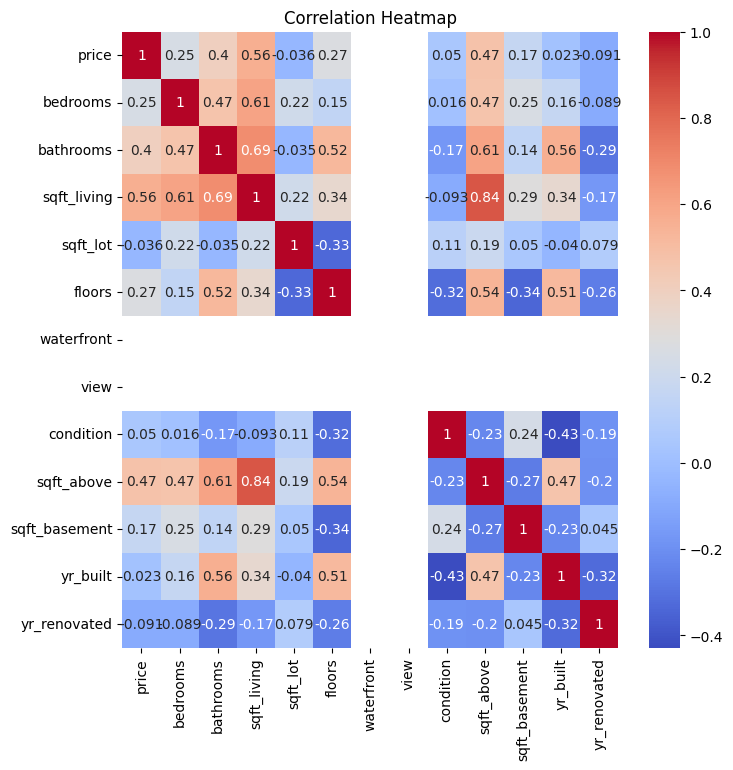

In [18]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
correlation_target = abs(correlation[target_column])
relevant_features = correlation_target[correlation_target > 0.3].index
df_filtered = df[relevant_features]

In [20]:
X = df_filtered.drop(target_column, axis=1)
y = df_filtered[target_column]

In [21]:
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

RandomForestRegressor()

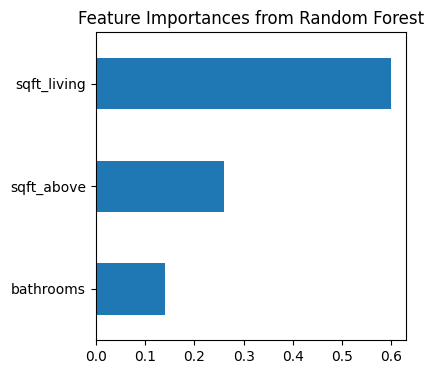

In [22]:
importances = pd.Series(model_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(4,4))
plt.title("Feature Importances from Random Forest")
plt.show()

In [23]:
selected_features = importances.sort_values(ascending=False).head(5).index
X_selected = X[selected_features]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Model Evaluation:
Mean Squared Error (MSE): 25938182964.41036
R² Score: 0.3376657250419062


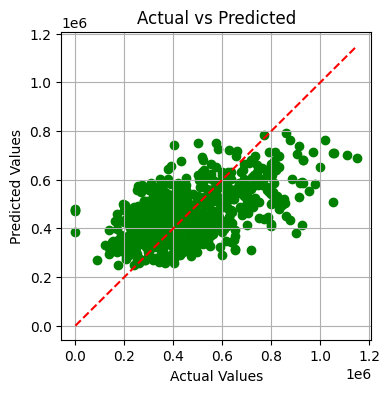

In [27]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()